In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [6]:
# load the data into dataframe
seeds = pd.read_csv('seeds_dataset.txt', 
                    sep='\t', 
                    names=['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry_coeff', 'length_groove', 'label']
                   )

In [7]:
# quick look if it came in right
seeds.describe()

area   perimeter  compactness      length       width  \
count  210.000000  210.000000   210.000000  210.000000  210.000000   
mean    14.847524   14.559286     0.870999    5.628533    3.258605   
std      2.909699    1.305959     0.023629    0.443063    0.377714   
min     10.590000   12.410000     0.808100    4.899000    2.630000   
25%     12.270000   13.450000     0.856900    5.262250    2.944000   
50%     14.355000   14.320000     0.873450    5.523500    3.237000   
75%     17.305000   15.715000     0.887775    5.979750    3.561750   
max     21.180000   17.250000     0.918300    6.675000    4.033000   

       asymmetry_coeff  length_groove       label  
count       210.000000     210.000000  210.000000  
mean          3.700201       5.408071    2.000000  
std           1.503557       0.491480    0.818448  
min           0.765100       4.519000    1.000000  
25%           2.561500       5.045000    1.000000  
50%           3.599000       5.223000    2.000000  
75%           4.768750       5.877000    3.000000  
max           8.456000       6.550000    3.000000

In [84]:
print(seeds.head().round(3).to_latex())

\begin{tabular}{lrrrrrrrl}
\toprule
{} &   area &  perimeter &  compactness &  length &  width &  asymmetry\_coeff &  length\_groove & label \\
\midrule
0 &  15.26 &      14.84 &        0.871 &   5.763 &  3.312 &            2.221 &          5.220 &  Kama \\
1 &  14.88 &      14.57 &        0.881 &   5.554 &  3.333 &            1.018 &          4.956 &  Kama \\
2 &  14.29 &      14.09 &        0.905 &   5.291 &  3.337 &            2.699 &          4.825 &  Kama \\
3 &  13.84 &      13.94 &        0.896 &   5.324 &  3.379 &            2.259 &          4.805 &  Kama \\
4 &  16.14 &      14.99 &        0.903 &   5.658 &  3.562 &            1.355 &          5.175 &  Kama \\
\bottomrule
\end{tabular}



In [48]:
seeds[seeds.columns[:-1]].describe()

area   perimeter  compactness      length       width  \
count  210.000000  210.000000   210.000000  210.000000  210.000000   
mean    14.847524   14.559286     0.870999    5.628533    3.258605   
std      2.909699    1.305959     0.023629    0.443063    0.377714   
min     10.590000   12.410000     0.808100    4.899000    2.630000   
25%     12.270000   13.450000     0.856900    5.262250    2.944000   
50%     14.355000   14.320000     0.873450    5.523500    3.237000   
75%     17.305000   15.715000     0.887775    5.979750    3.561750   
max     21.180000   17.250000     0.918300    6.675000    4.033000   

       asymmetry_coeff  length_groove  
count       210.000000     210.000000  
mean          3.700201       5.408071  
std           1.503557       0.491480  
min           0.765100       4.519000  
25%           2.561500       5.045000  
50%           3.599000       5.223000  
75%           4.768750       5.877000  
max           8.456000       6.550000

In [55]:
seeds[seeds[seeds.columns[-1]] == 3].describe()

area  perimeter  compactness     length      width  \
count  70.000000  70.000000    70.000000  70.000000  70.000000   
mean   11.873857  13.247857     0.849409   5.229514   2.853771   
std     0.723004   0.340196     0.021760   0.138015   0.147516   
min    10.590000  12.410000     0.808100   4.899000   2.630000   
25%    11.262500  13.002500     0.834000   5.136250   2.725500   
50%    11.835000  13.250000     0.849350   5.224000   2.834500   
75%    12.425000  13.470000     0.861825   5.323750   2.967000   
max    13.370000  13.950000     0.897700   5.541000   3.232000   

       asymmetry_coeff  length_groove  label  
count        70.000000      70.000000   70.0  
mean          4.788400       5.116400    3.0  
std           1.336465       0.162068    0.0  
min           1.661000       4.745000    3.0  
25%           4.048750       5.002000    3.0  
50%           4.839000       5.091500    3.0  
75%           5.467250       5.228500    3.0  
max           8.456000       5.491000    3.0

In [5]:
# check if types were recognized correctly
seeds.dtypes

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
length_groove      float64
label                int64
dtype: object

In [79]:
def wheatname(x):
    if x == 1:
        return 'Kama'
    elif x == 2:
        return 'Rosa'
    else:
        return 'Canadian'
    
seeds.label = seeds.label.map(wheatname)

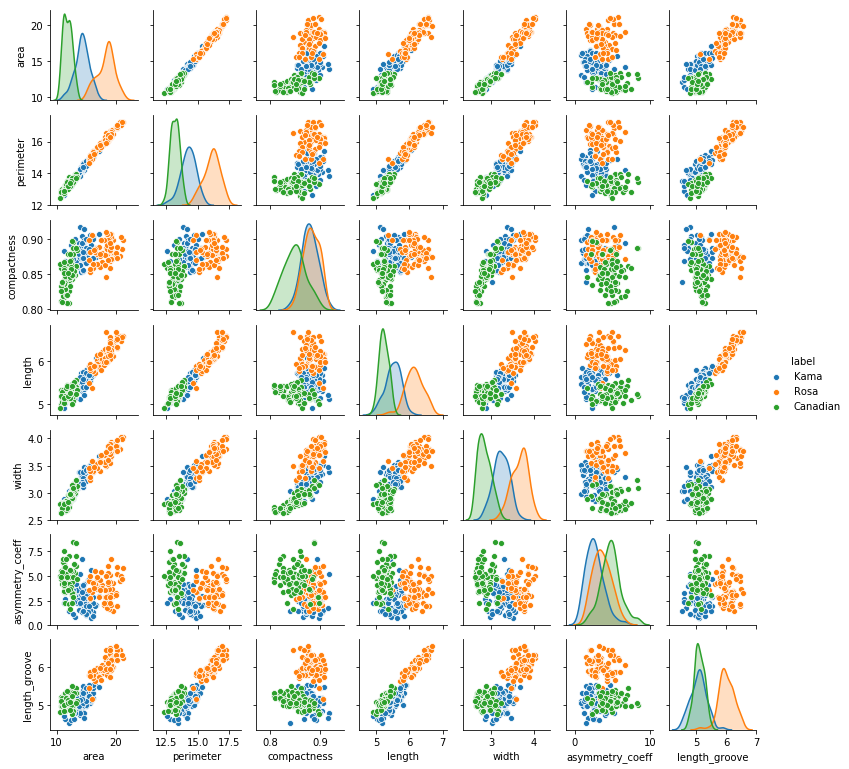

In [83]:
# overview of what the data looks like
pairplot = sns.pairplot(seeds, hue='label', height=1.5)
#pairplot.savefig("seeds_pairplot_undifferentiated.pdf")

In [74]:
from scipy import stats
pts = 1000
np.random.seed(28041990)
a = np.random.normal(0, 1, size=pts)
b = np.random.normal(2, 1, size=pts)
for i in range(7):
    x = seeds[seeds.columns[i]][seeds.label == 3]  # np.concatenate((a, b))
    k2, p = stats.normaltest(x)
    alpha = 1e-2
    print(seeds.columns[i])
    print("p = {:g}".format(p))

    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

area
p = 0.0449378
The null hypothesis cannot be rejected
perimeter
p = 0.671772
The null hypothesis cannot be rejected
compactness
p = 0.657696
The null hypothesis cannot be rejected
length
p = 0.652212
The null hypothesis cannot be rejected
width
p = 0.111073
The null hypothesis cannot be rejected
asymmetry_coeff
p = 0.259978
The null hypothesis cannot be rejected
length_groove
p = 0.796538
The null hypothesis cannot be rejected


In [70]:
1e-3

0.001

In [6]:
# check if basic method works
kmeans = KMeans(n_clusters=16, random_state=0).fit(seeds[seeds.columns[:-1]])
type(kmeans)

sklearn.cluster._kmeans.KMeans

In [7]:
# how many clusters to chose?
# only parameter to make difference here is k
# look at different indices for different k

# dunn index not in sklearn, found at https://github.com/jqmviegas/jqm_cvi
from dunn import dunn, dunn_fast

indices = pd.DataFrame(columns=['number', 'Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn', 'Distances'])

for i in range(2, 10):
    
    kmeans = KMeans(n_clusters=i, random_state=0).fit(seeds[seeds.columns[:-1]])
    
    ch = metrics.calinski_harabaz_score(seeds[seeds.columns[:-1]], kmeans.labels_)
    db = metrics.davies_bouldin_score(seeds[seeds.columns[:-1]], kmeans.labels_)
    si = metrics.silhouette_score(seeds[seeds.columns[:-1]], kmeans.labels_)
    dn = dunn_fast(seeds[seeds.columns[:-1]], kmeans.labels_)
    di = kmeans.inertia_
    
    indices = indices.append({'number': i,
                              'Calinski-Harabasz': ch,
                              'Davies-Bouldin': db,
                              'Silhouette': si,
                              'Dunn': dn, 
                              'Distances': di}, 
                             ignore_index=True)

AttributeError: module 'sklearn.metrics' has no attribute 'calinski_harabaz_score'

In [9]:
indices

number  Calinski-Harabasz  Davies-Bouldin  Silhouette      Dunn  \
0     2.0         351.179992        0.690980    0.518287  0.040384   
1     3.0         375.804961        0.753314    0.471934  0.085507   
2     4.0         327.855313        0.887602    0.396465  0.075360   
3     5.0         310.331840        0.915267    0.361323  0.091359   
4     6.0         301.837149        0.928449    0.361271  0.106061   
5     7.0         295.382574        0.917866    0.367379  0.062993   
6     8.0         297.386545        0.940332    0.361192  0.083766   
7     9.0         288.810692        0.899075    0.359025  0.078140   

     Distances  
0  1011.712345  
1   587.318612  
2   471.003396  
3   385.507292  
4   323.870248  
5   279.517700  
6   240.578354  
7   217.676083

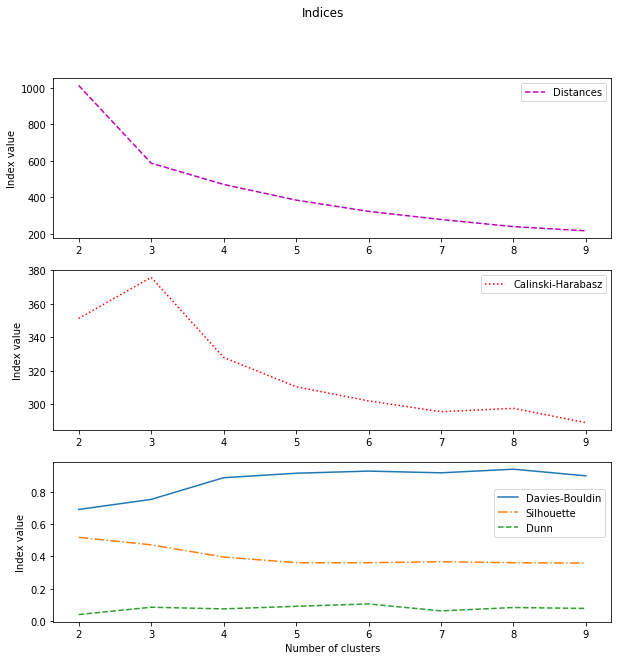

CPU times: user 435 ms, sys: 4.01 ms, total: 439 ms
Wall time: 444 ms


In [22]:
%%time
x = np.array(indices['number'])
Y = np.array(indices[['Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn', 'Distances']])

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Indices')

ax = fig.add_subplot(3,1,1)
ax.plot(x, Y[:, 4], label='Distances', color='m', linestyle='dashed', linewidth=1.5)
ax.legend()
ax.set_ylabel('Index value')

ax = fig.add_subplot(3,1,2)
ax.plot(x, Y[:, 0], label='Calinski-Harabasz', color='r', linestyle='dotted', linewidth=1.5)
ax.legend()
ax.set_ylabel('Index value')

ax = fig.add_subplot(3,1,3)
ax.plot(x, Y[:, 1], label='Davies-Bouldin', linestyle='solid', linewidth=1.5)
ax.plot(x, Y[:, 2], label='Silhouette', linestyle='dashdot', linewidth=1.5)
ax.plot(x, Y[:, 3], label='Dunn', linestyle='dashed', linewidth=1.5)
ax.legend(bbox_to_anchor=(0.78,0.5))
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Index value')

plt.show()

Distances show kink at 3 clusters, C-H peaks at 3 clusters, others seem inconclusive but flatten out around the 3 to 4 cluster mark. This seems in line with the information we have going in of having three different types of seeds in the dataset. 

In [9]:
# 'final' configuration
kmeans = KMeans(n_clusters=3, random_state=0).fit(seeds[seeds.columns[:-1]])

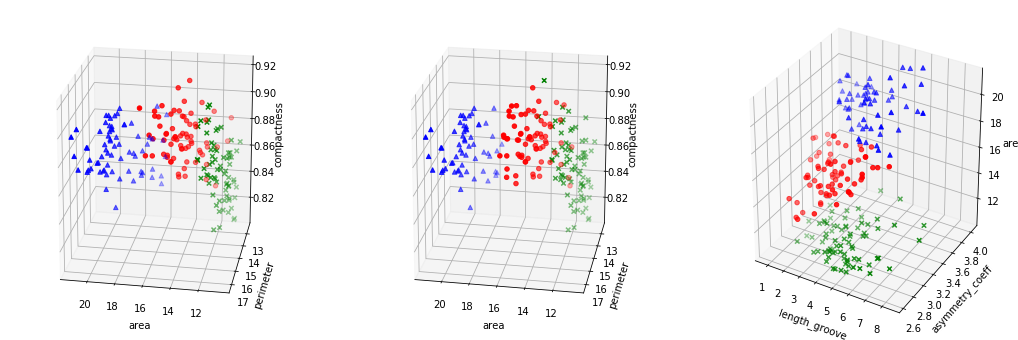

In [13]:
# what does it look like?
# first combine data and labels
labeled_seeds = np.c_[seeds, kmeans.labels_]

fig = plt.figure(figsize=(18, 6))

# show first angle
ax = fig.add_subplot(131, projection='3d', azim=100, elev=20, proj_type='persp')

for c, m, l in [('r', 'o', 1), ('b', '^', 2), ('g', 'x', 3)]:
    xs = labeled_seeds[labeled_seeds[:,-2] == l][:, 0]
    ys = labeled_seeds[labeled_seeds[:,-2] == l][:, 1]
    zs = labeled_seeds[labeled_seeds[:,-2] == l][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(seeds.columns[0])
ax.set_ylabel(seeds.columns[1])
ax.set_zlabel(seeds.columns[2])
ax.set_title('')

# show first angle clustered
ax = fig.add_subplot(132, projection='3d', azim=100, elev=20, proj_type='persp')

for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = labeled_seeds[labeled_seeds[:,-1] == l][:, 0]
    ys = labeled_seeds[labeled_seeds[:,-1] == l][:, 1]
    zs = labeled_seeds[labeled_seeds[:,-1] == l][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(seeds.columns[0])
ax.set_ylabel(seeds.columns[1])
ax.set_zlabel(seeds.columns[2])
ax.set_title('')

# show second angle
ax = fig.add_subplot(133, projection='3d')

for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = labeled_seeds[labeled_seeds[:,-1] == l][:, 5]
    ys = labeled_seeds[labeled_seeds[:,-1] == l][:, 4]
    zs = labeled_seeds[labeled_seeds[:,-1] == l][:, 0]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(seeds.columns[6])
ax.set_ylabel(seeds.columns[5])
ax.set_zlabel(seeds.columns[0])
ax.set_title('')

plt.show()

In [74]:
kmeans.cluster_centers_

array([[14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948]])

The clustering seems adequate when looking at three dimensional subsets of the data (looking at the full dimensions sure would be nice, but the limitations of the brain and all..). All clusters seem to be reasonably coherent, of similar size (the raw data showed an even thirds split) and exhibit more or less the rounded shape expected from kmeans clustering.

The question remains, if this could be improved on. Two ideas that spring to mind are norming and scaling as well as the somewhat more involved process of principal component analysis. Deeper examination seems beyond the scope of this work, but a brief look should be possible.

In [81]:
# principal component analysis. 
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
_ = pca.fit_transform(seeds[seeds.columns[:-1]])
with np.printoptions(precision=4, suppress=True):
    print('explained variance:', pca.explained_variance_ratio_)

explained variance: [0.8294 0.1636 0.0057 0.001  0.0002]


In [86]:
# given that the first two components explain 99.3% of variance and the first three
# explain 99.9%, it seems logical to look at these two options

# do the transform
pca = PCA(n_components=3)
seeds_pca_three = pca.fit_transform(seeds[seeds.columns[:-1]])
seeds_pca_two = seeds_pca_three[:, 0:2]

# do the clustering
kmeans_pca_two = KMeans(n_clusters=3, random_state=0).fit(seeds_pca_two)
kmeans_pca_three = KMeans(n_clusters=3, random_state=0).fit(seeds_pca_three)

# label the transformed data
seeds_pca_two_labeled = np.c_[seeds_pca_two, kmeans_pca_two.labels_]
seeds_pca_three_labeled = np.c_[seeds_pca_three, kmeans_pca_three.labels_]

# label the original data with the transformed labels
seeds_pca_two_labeled_original = np.c_[seeds[seeds.columns[:-1]], kmeans_pca_two.labels_]
seeds_pca_three_labeled_original = np.c_[seeds[seeds.columns[:-1]], kmeans_pca_three.labels_]

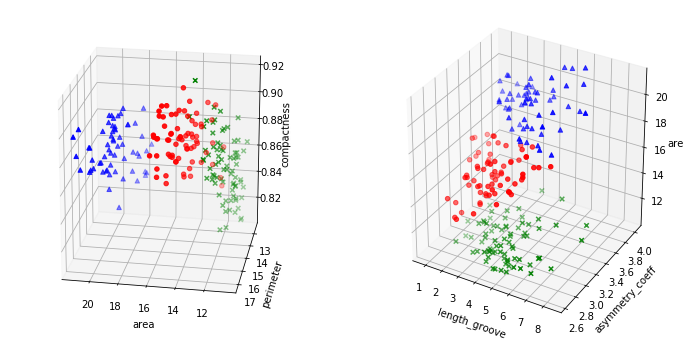

In [89]:
# what does 3d PCA clustering look like?
fig = plt.figure(figsize=(12, 6))

# show first angle
ax = fig.add_subplot(121, projection='3d', azim=100, elev=20)

for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = seeds_pca_three_labeled_original[seeds_pca_three_labeled_original[:,-1] == l][:, 0]
    ys = seeds_pca_three_labeled_original[seeds_pca_three_labeled_original[:,-1] == l][:, 1]
    zs = seeds_pca_three_labeled_original[seeds_pca_three_labeled_original[:,-1] == l][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(seeds.columns[0])
ax.set_ylabel(seeds.columns[1])
ax.set_zlabel(seeds.columns[2])
ax.set_title('')

# show second angle
ax = fig.add_subplot(122, projection='3d')

for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = seeds_pca_three_labeled_original[seeds_pca_three_labeled_original[:,-1] == l][:, 5]
    ys = seeds_pca_three_labeled_original[seeds_pca_three_labeled_original[:,-1] == l][:, 4]
    zs = seeds_pca_three_labeled_original[seeds_pca_three_labeled_original[:,-1] == l][:, 0]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(seeds.columns[6])
ax.set_ylabel(seeds.columns[5])
ax.set_zlabel(seeds.columns[0])
ax.set_title('')

plt.show()

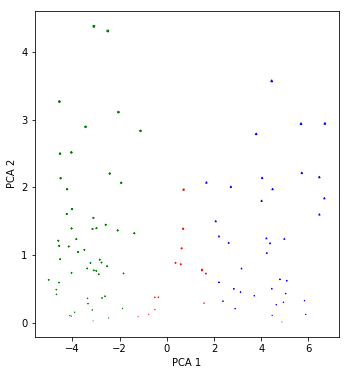

In [92]:
# what does 2d PCA clustering look like?
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121)

for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = seeds_pca_three_labeled[seeds_pca_three_labeled_original[:,-1] == l][:, 0]
    ys = seeds_pca_three_labeled[seeds_pca_three_labeled_original[:,-1] == l][:, 1]
    zs = seeds_pca_three_labeled[seeds_pca_three_labeled_original[:,-1] == l][:, 1]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('')

plt.show()

In [104]:
indices_comparison = pd.DataFrame(columns=['method', 'Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn', 'Distances'])

for attr, value in {'kmeans': kmeans, 'kmeans pca 2d': kmeans_pca_two, 'kmeans pca 3d': kmeans_pca_three}.items():
    ch = metrics.calinski_harabaz_score(seeds[seeds.columns[:-1]], value.labels_)
    db = metrics.davies_bouldin_score(seeds[seeds.columns[:-1]], value.labels_)
    si = metrics.silhouette_score(seeds[seeds.columns[:-1]], value.labels_)
    dn = dunn_fast(seeds[seeds.columns[:-1]], value.labels_)
    di = value.inertia_
    
    indices_comparison = indices_comparison.append({'method': attr,
                                                    'Calinski-Harabasz': ch,
                                                    'Davies-Bouldin': db,
                                                    'Silhouette': si,
                                                    'Dunn': dn, 
                                                    'Distances': di}, 
                                                   ignore_index=True)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [105]:
indices_comparison

method  Calinski-Harabasz  Davies-Bouldin  Silhouette      Dunn  \
0         kmeans         375.804961        0.753314    0.471934  0.085507   
1  kmeans pca 2d         375.804961        0.753314    0.471934  0.085507   
2  kmeans pca 3d         375.804961        0.753314    0.471934  0.085507   

    Distances  
0  587.318612  
1  569.889890  
2  584.078516

It appears PCA did not make much of a difference to this dataset, if at all.

When looking at the pairplot, it does not appear as if the features are normally distributed. Assessing the true underlying kind of distribution does not seem feasible with the amount of data given. Standardizing does not appear as a good solution then. Normalizing though does not seem problematic and can be tried (scaling all values between 0 an 1).

In [107]:
# normalize the data
seeds_normalized = (seeds-seeds.min())/(seeds.max()-seeds.min())

In [109]:
kmeans_normalized = KMeans(n_clusters=3, random_state=0).fit(seeds_normalized[seeds_normalized.columns[:-1]])

In [110]:
indices_comparison = pd.DataFrame(columns=['method', 'Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette', 'Dunn', 'Distances'])

for attr, value in {'kmeans normalized': kmeans_normalized}.items():
    ch = metrics.calinski_harabaz_score(seeds[seeds.columns[:-1]], value.labels_)
    db = metrics.davies_bouldin_score(seeds[seeds.columns[:-1]], value.labels_)
    si = metrics.silhouette_score(seeds[seeds.columns[:-1]], value.labels_)
    dn = dunn_fast(seeds[seeds.columns[:-1]], value.labels_)
    di = value.inertia_
    
    indices_comparison = indices_comparison.append({'method': attr,
                                                    'Calinski-Harabasz': ch,
                                                    'Davies-Bouldin': db,
                                                    'Silhouette': si,
                                                    'Dunn': dn, 
                                                    'Distances': di}, 
                                                   ignore_index=True)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [111]:
indices_comparison

method  Calinski-Harabasz  Davies-Bouldin  Silhouette      Dunn  \
0  kmeans normalized         359.002452        0.778777    0.453801  0.019204   

   Distances  
0  22.024363

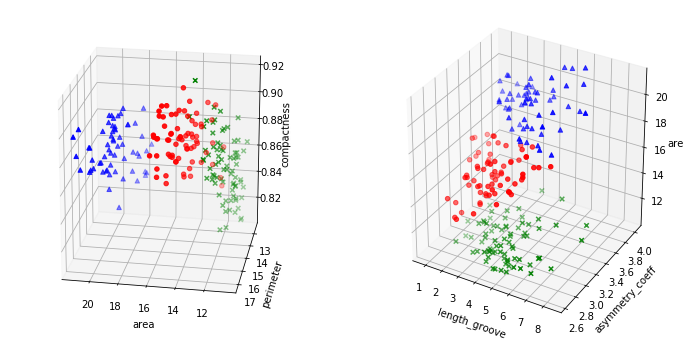

In [112]:
# what does 3d PCA clustering look like?
fig = plt.figure(figsize=(12, 6))

seeds_normalized_labeled = np.c_[seeds, kmeans_pca_three.labels_]

# show first angle
ax = fig.add_subplot(121, projection='3d', azim=100, elev=20)

for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = seeds_normalized_labeled[seeds_normalized_labeled[:,-2] == l][:, 0]
    ys = seeds_normalized_labeled[seeds_normalized_labeled[:,-2] == l][:, 1]
    zs = seeds_normalized_labeled[seeds_normalized_labeled[:,-2] == l][:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(seeds.columns[0])
ax.set_ylabel(seeds.columns[1])
ax.set_zlabel(seeds.columns[2])
ax.set_title('')

# show second angle
ax = fig.add_subplot(122, projection='3d')

for c, m, l in [('r', 'o', 0), ('b', '^', 1), ('g', 'x', 2)]:
    xs = seeds_normalized_labeled[seeds_normalized_labeled[:,-1] == l][:, 5]
    ys = seeds_normalized_labeled[seeds_normalized_labeled[:,-1] == l][:, 4]
    zs = seeds_normalized_labeled[seeds_normalized_labeled[:,-1] == l][:, 0]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel(seeds.columns[6])
ax.set_ylabel(seeds.columns[5])
ax.set_zlabel(seeds.columns[0])
ax.set_title('')

plt.show()

This step also appears to be of limited to no value. Sad.

In [15]:
from sklearn.manifold import TSNE

# list of tuples of (color, marker, label) for each possible cluster
clusters = [
  ('r', 'o', 0), 
  ('b', '^', 1), 
  ('g', 'x', 2), 
  ('m', '.', 3), 
  ('y', '*', 4), 
  ('c', '+', 5),
  ('maroon', '>', 6),
  ('lime', 'D', 7),
  ('gold', 'H', 8),
  ('indigo', '1', 9),
  ('aquamarine', 'v', 10),
]

def plot_tsne_2d(data, labels, title='', size=(12, 12), state=None, returns='plot'):
  '''
  data:     n x m matrix of data (n observations, m features)
  labels:   label array for all observations
  title:    title for the plot (default '')
  size:     size-tuple for the plot (width, height) in inches (default (12,12))
  state:    random initialization (default None)
  returns:  'plot' returns nothing and just plots
            'fig' returns figure object
  '''

  data_projected_2d = TSNE(n_components=2, random_state=state).fit_transform(data)

  labeled_data = np.c_[data_projected_2d, labels]

  fig = plt.figure(figsize=size)
  ax = fig.add_subplot(111)

  # number of clusters
  n = len(set(labels))

  # adds seperate scatter for each cluster 
  for color, marker, label in clusters[0:n]:
    current_cluster = labeled_data[labeled_data[:,-1] == label]

    ax.scatter(
      current_cluster[:, 0], 
      current_cluster[:, 1], 
      c=color, 
      marker=marker
    )

  ax.set_title(title)

  if returns == 'plot':
    plt.show()
  else:
    return fig

In [55]:
kmeans = KMeans(n_clusters=3, random_state=0, init='random', n_init=1, max_iter=400, algorithm='full').fit(seeds[seeds.columns[:-1]])

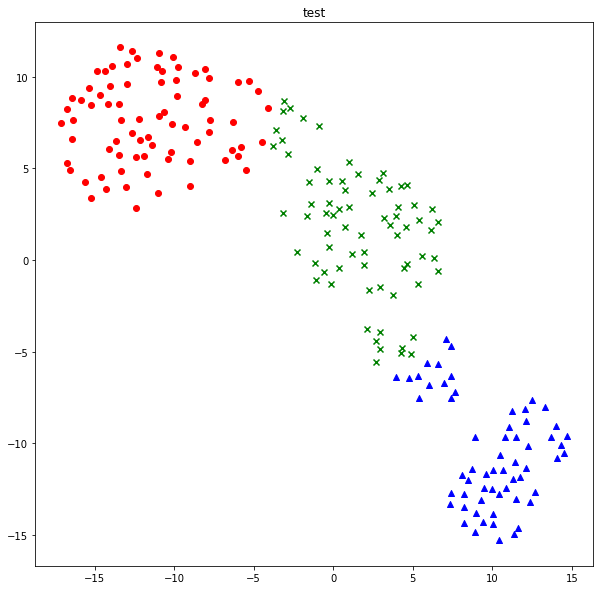

In [56]:
plot_tsne_2d(seeds[seeds.columns[:-1]], kmeans.labels_, title='test', size=(10, 10), state=0, returns='plot')

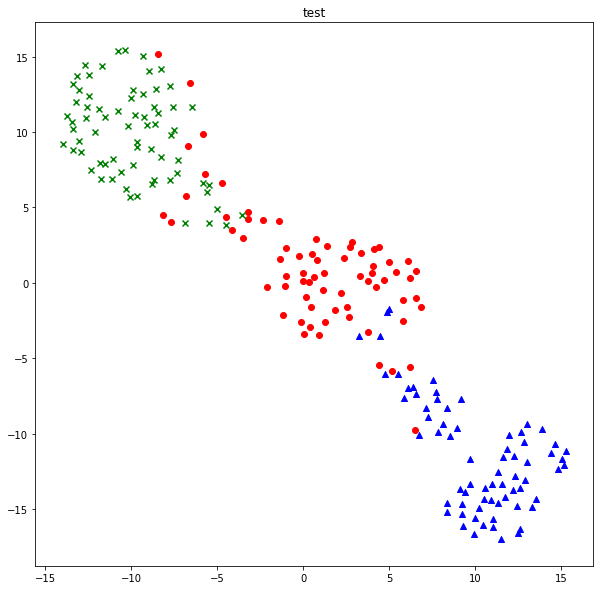

In [17]:
plot_tsne_2d(seeds[seeds.columns[:-1]], seeds[seeds.columns[-1]]-1, title='test', size=(10, 10), state=0, returns='plot')

In [33]:
from sklearn.manifold import TSNE

# list of tuples of (color, marker, label) for each possible cluster
clusters = [
  ('r', 'o', 0), 
  ('b', '^', 1), 
  ('g', 'x', 2), 
  ('m', '.', 3), 
  ('y', '*', 4), 
  ('c', '+', 5),
  ('maroon', '>', 6),
  ('lime', 'D', 7),
  ('gold', 'H', 8),
  ('indigo', '1', 9),
  ('aquamarine', 'v', 10),
]

def plot_tsne_2d(data, labels, title='', size=(16, 8), state=None, returns='plot'):
  '''
  data:     n x m matrix of data (n observations, m features)
  labels:   label array for all observations
  title:    title for the plot (default '')
  size:     size-tuple for the plot (width, height) in inches (default (12,12))
  state:    random initialization (default None)
  returns:  'plot' returns nothing and just plots
            'fig' returns figure object
  '''

  data_projected_2d = TSNE(n_components=2, random_state=state).fit_transform(data)

  labeled_data = np.c_[data_projected_2d, labels]

  fig = plt.figure(figsize=size)
  ax = fig.add_subplot(121)

  # number of clusters
  n = len(set(labels))

  # adds seperate scatter for each cluster 
  for color, marker, label in clusters[0:n]:
    current_cluster = labeled_data[labeled_data[:,-1] == label]

    ax.scatter(
      current_cluster[:, 0], 
      current_cluster[:, 1], 
      c=color, 
      marker=marker
    )

  ax.set_title('K-Means Clustering Result')

  ax = fig.add_subplot(122)
  
  labeled_data = np.c_[data_projected_2d, seeds[seeds.columns[-1]]-1]

  # number of clusters
  n = len(set(labels))

  # adds seperate scatter for each cluster 
  for color, marker, label in clusters[0:n]:
    current_cluster = labeled_data[labeled_data[:,-1] == label]

    ax.scatter(
      current_cluster[:, 0], 
      current_cluster[:, 1], 
      c=color, 
      marker=marker
    )

  ax.set_title('Original Data')


  fig.tight_layout()
  plt.savefig('kmeans_seeds_tsne.pdf')

  if returns == 'plot':
    plt.show()
  else:
    return fig

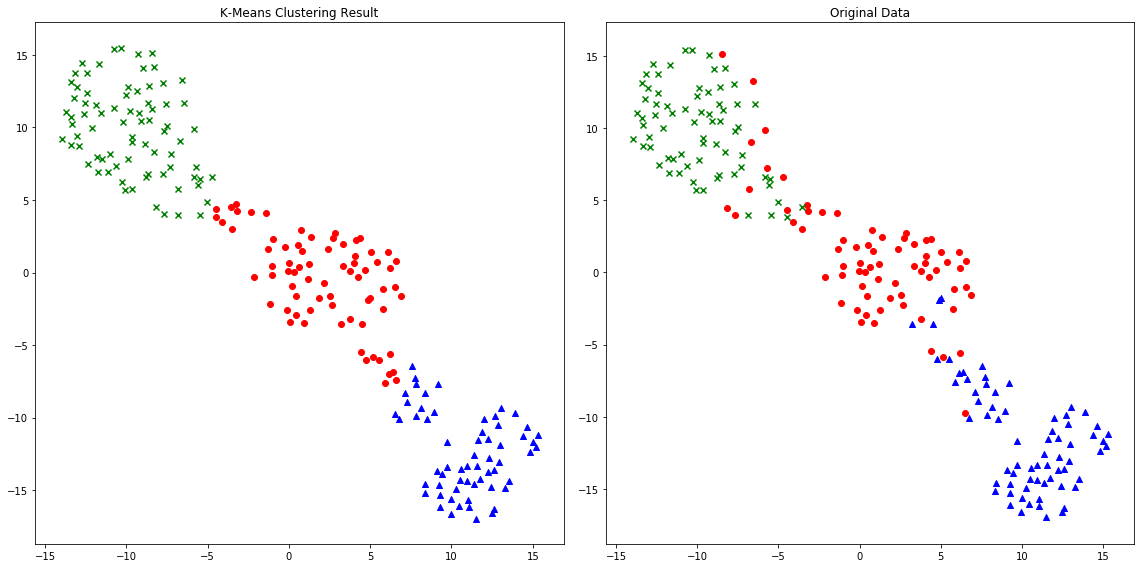

In [34]:
plot_tsne_2d(seeds[seeds.columns[:-1]], kmeans.labels_, title='test', state=0, returns='plot')

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(seeds[seeds.columns[-1]]-1, kmeans.labels_, normalize=True)

0.8952380952380953

In [31]:
from sklearn.metrics import precision_score

precision_score(seeds[seeds.columns[-1]]-1, kmeans.labels_, average='weighted')

0.9000189246090885

In [32]:
from sklearn.metrics import recall_score

recall_score(seeds[seeds.columns[-1]]-1, kmeans.labels_, average='weighted')

0.8952380952380953

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('accuracy score: ', accuracy_score(seeds[seeds.columns[-1]]-1, kmeans.labels_, normalize=True))
print('precision score: ', precision_score(seeds[seeds.columns[-1]]-1, kmeans.labels_, average='weighted'))
print('recall score: ', recall_score(seeds[seeds.columns[-1]]-1, kmeans.labels_, average='weighted'))

In [85]:
algorithm = 'kmeans'

{'kmeans': [2, 8, 3],
        'spectral': [2, 8, 3],
        'affinity': [-10000, -50, -7000],
        'meanshift': [1, 6, 2]}[algorithm]

[2, 8, 3]

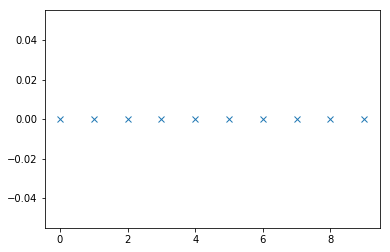

In [3]:
val = 0. # this is the value where you want the data to appear on the y-axis.
ar = np.arange(10) # just as an example array
plt.plot(ar, np.zeros_like(ar) + val, 'x')
plt.show()